<h1 style="font-size:6rem;color:Red;text-align:center;">Fake News</h1>

# Supervised Learning, Classification

## PassiveAggressiveClassifier

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

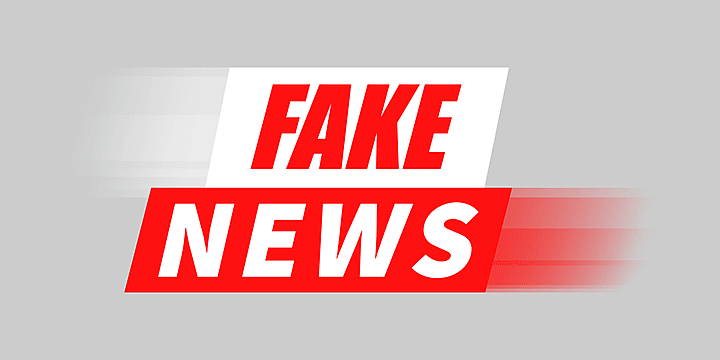

# Read data from csv file

In [ ]:
df=pd.read_csv('news.csv')
df.head()

# How many fake and real news

In [ ]:
df.label.value_counts()

In [ ]:
label=df.label
label.head()

In [ ]:
df.isnull().sum()

In [ ]:
df['all']=df['title']+df['text']

In [ ]:
x=df.drop(columns='label',axis=(1))
y=df['label']

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
x=df['all'].values
y=df['label'].values

In [ ]:
y.shape

# Data separation

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=1)

# TfidfVectorizer

In [ ]:
TfV=TfidfVectorizer(stop_words='english', max_df=0.7)

In [ ]:
tfidf_train=TfV.fit_transform(x_train) 
tfidf_test=TfV.transform(x_test)

In [ ]:
alg=PassiveAggressiveClassifier(max_iter=50)
alg.fit(tfidf_train,y_train)

# Accuracy

In [ ]:
y_pred=alg.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
score

# Confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# Plot the Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

from sklearn.metrics import classification_report
classification_report(y_test,y_pred)